## EDA with Python and Applying Logistic Regression

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **Missing Data**

lets begin with finding the missing values.

In [4]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

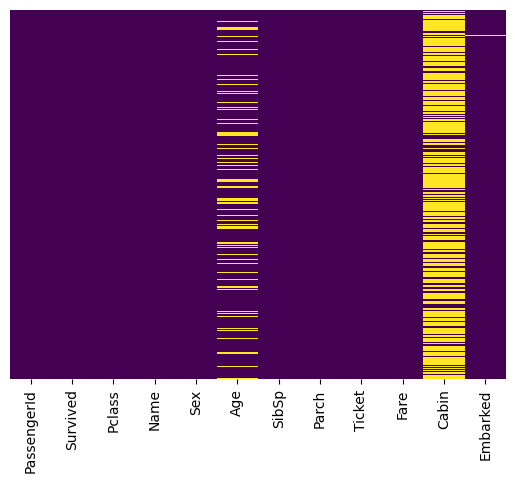

In [6]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

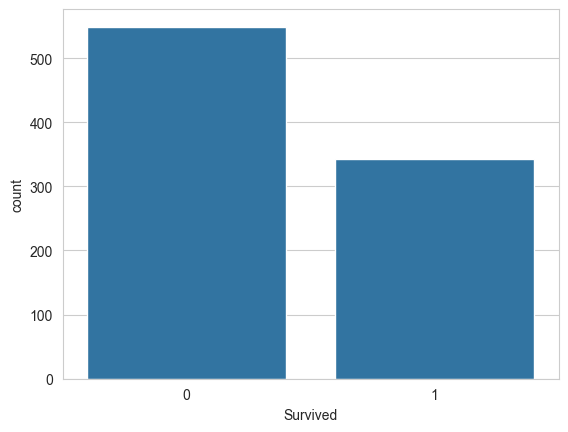

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

<Axes: xlabel='Survived', ylabel='count'>

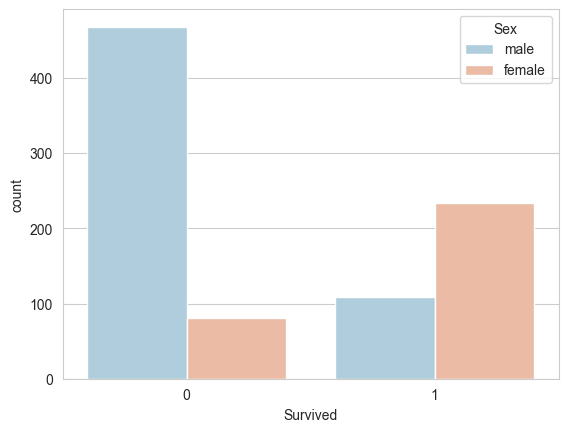

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train, palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

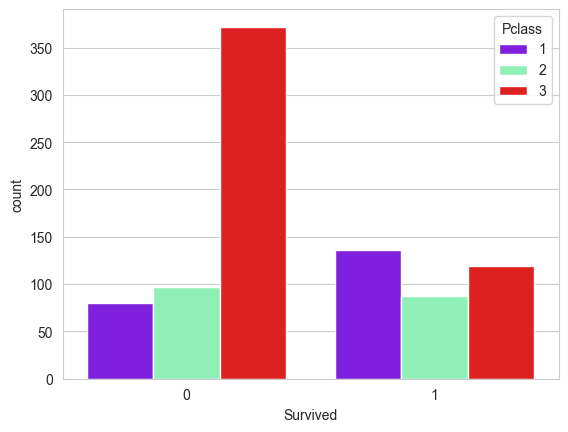

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

<Axes: xlabel='Age', ylabel='Count'>

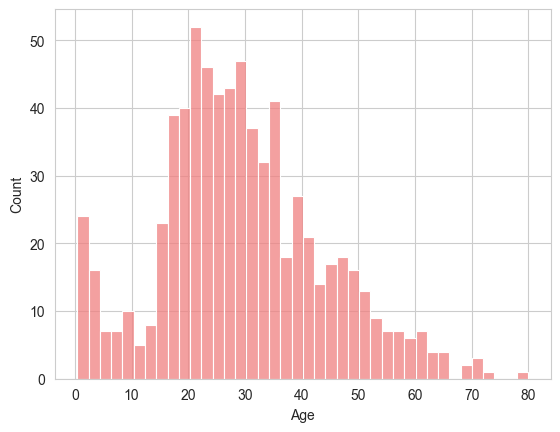

In [17]:
sns.histplot(train['Age'].dropna(),color='lightcoral',bins=40)

<Axes: >

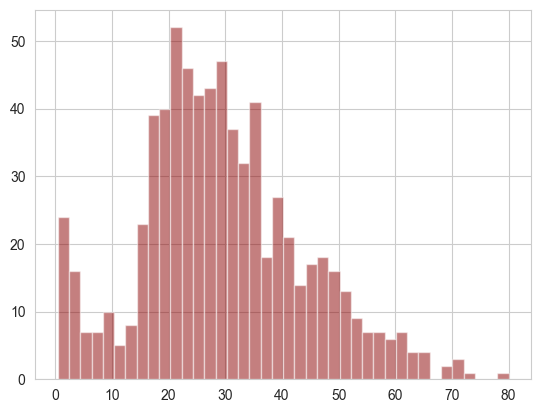

In [20]:
train['Age'].hist(bins=40,color='darkred',alpha=0.5)

<Axes: xlabel='SibSp', ylabel='count'>

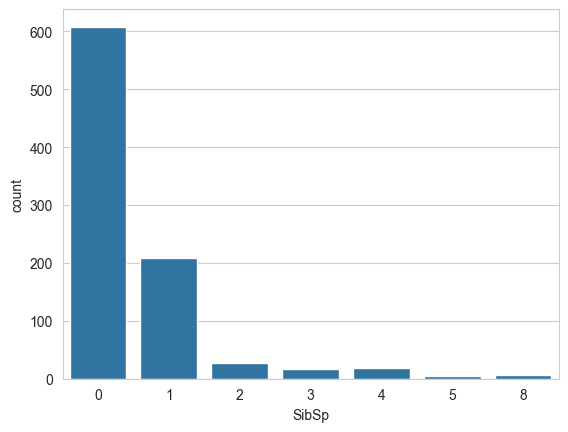

In [23]:
sns.countplot(x='SibSp',data=train)

<Axes: >

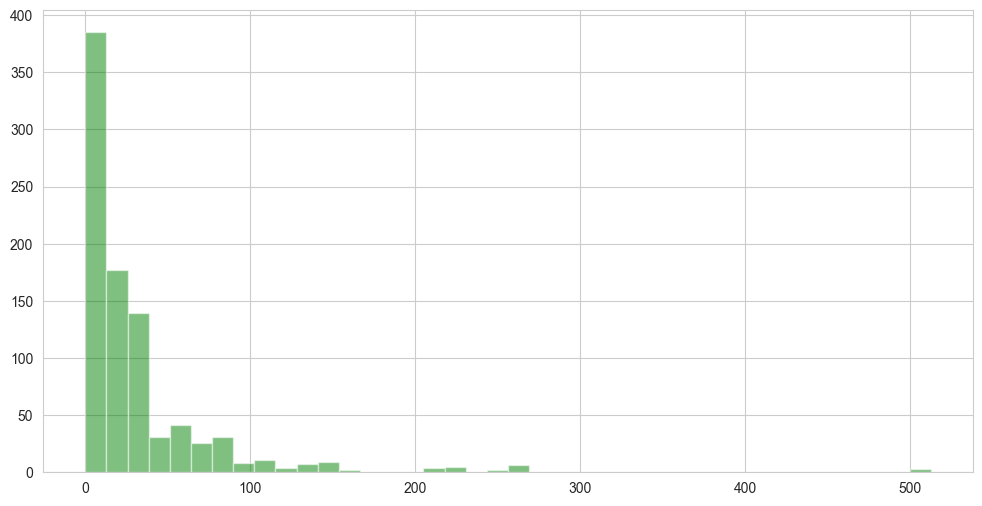

In [25]:
train['Fare'].hist(color='green',bins=40,alpha=0.5,figsize=(12,6))

In [26]:
train['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

## **Data Cleaning**

We want to fill in the missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean of all the passengers(imputation). However we can be smarter about this and check the average age by passenger class. For example:

<Axes: xlabel='Pclass', ylabel='Age'>

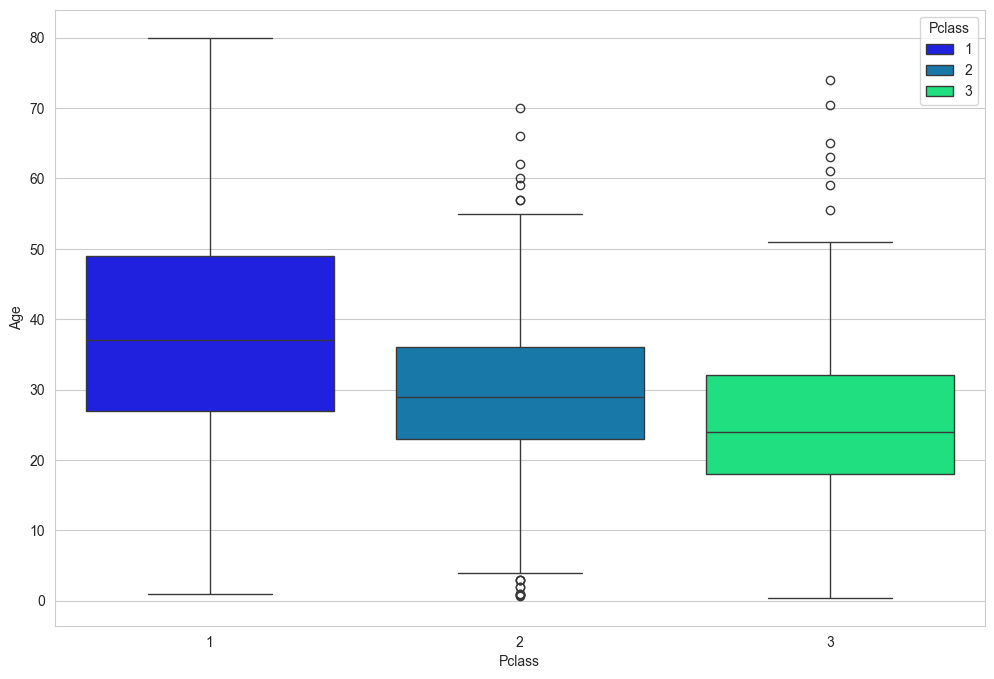

In [37]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter',hue='Pclass')


In [42]:
print(int(train.loc[train['Pclass']==1,'Age'].mean()))
print(int(train.loc[train['Pclass']==2,'Age'].mean()))
print(int(train.loc[train['Pclass']==3,'Age'].mean()))

38
29
25


In [43]:
class1age_mean=int(train.loc[train['Pclass']==1,'Age'].mean())
class2age_mean=int(train.loc[train['Pclass']==2,'Age'].mean())
class3age_mean=int(train.loc[train['Pclass']==3,'Age'].mean())

<Axes: >

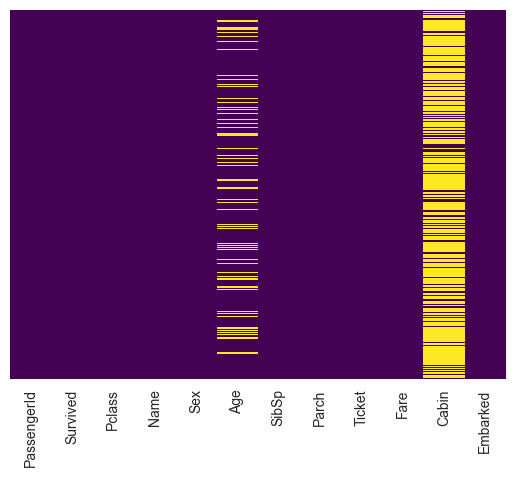

In [29]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [49]:
def impute_age(cols):
    Age, Pclass = cols
    if pd.isnull(Age):
        if Pclass==1:
            return class1age_mean
        elif Pclass==2:
            return class2age_mean
        else:
            return class3age_mean
    else:
        return Age

In [52]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

We can also use the `fillna()` method in pandas dataframe to fill the null values in the train dataframe.

`train.loc[train['Pclass']==1,'Age'].fillna(38,inplace=True)`
`train.loc[train['Pclass']==2,'Age'].fillna(29,inplace=True)`
`train.loc[train['Pclass']==3,'Age'].fillna(25,inplace=True)`

Use `impute_age` with `apply` if you need more complex logic, readability, and     reusability across different parts of your project.
<br>Use `fillna` with conditional filtering if you prioritize performance, simplicity, and conciseness for a straightforward imputation task.

<Axes: >

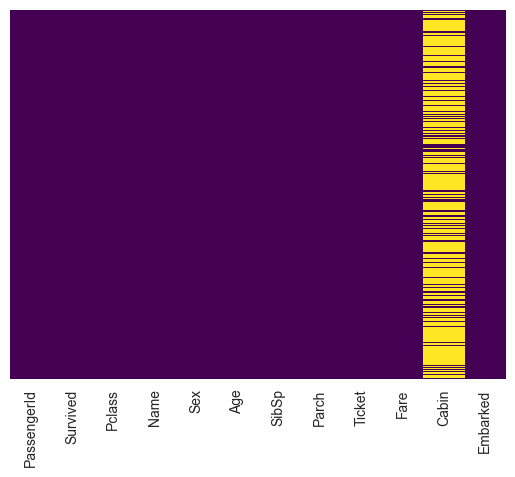

In [53]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [54]:
train.drop(columns=['Cabin'],inplace=True)

<Axes: >

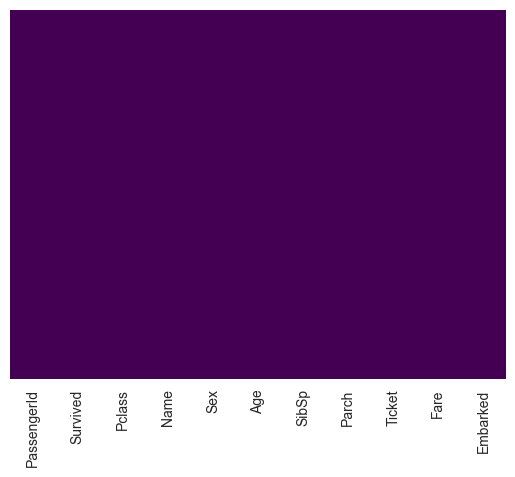

In [55]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [56]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [57]:
train.dropna(inplace=True)

## **Converting Categorical Feature**

We'll need to convert eh categorical features to dummy variables using pandas. Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [63]:
pd.get_dummies(train['Embarked'],drop_first=True,dtype=int).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [64]:
sex=pd.get_dummies(train['Sex'],drop_first=True,dtype=int)
embark=pd.get_dummies(train['Embarked'],drop_first=True,dtype=int)

In [66]:
train.drop(columns=['Sex','Embarked','Name','Ticket'],inplace=True)

In [67]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [68]:
train=pd.concat([train,sex,embark],axis=1)

In [70]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


**Great! Our data is ready for our model!**